# Heart Stroke Prediction with K-Nearest Neighbors

In this notebook we want to predict the possibility of heart stroke, given a dataset of symptoms and specifications of patients. We wish to use KNN as the predictor model.

### Loading Necessary Libraries:

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import mode

### Downloading the dataset:

In [88]:
file_id = '1w_4xTCDYcY-lu3p1zB3pT2EjM7CuXIaa'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### Dropping the id field:
it is useless and not informative.

In [89]:
df.drop("id", axis=1, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### quantizing the gender field:
from categorical to numeric (Male: 1, Female: 0, Other: 2)

In [90]:
# df['gender'].isna().sum()  ## equals 0 so there is no NaN

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,1,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,0,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,0,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,1,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,0,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,0,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,1,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### quantizing the ever_married and other fields:
from categorical to numeric (Male: 1, Female: 0, Other: 2)

In [91]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Rural': 1, 'Urban': 0})

In [92]:
df['work_type'].drop_duplicates()

,work_type
0,children
1,Private
4,Never_worked
7,Self-employed
10,Govt_job


In [93]:
## The best approach is using One-Hot Encoding for this field:
## But before inserting new columns, we must think of removing the NaN

df['smoking_status'] = df['smoking_status'].fillna('unknown')     ## Creating a new class since there are many samples with NaN
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())                    ## Replacing the NaN values with the mean since it is a numeric feature

df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], dtype=int)
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,1,3.0,0,0,0,1,95.12,18.0,0,0,0,0,0,1,0,0,0,1
1,1,58.0,1,0,1,0,87.96,39.2,0,0,0,1,0,0,0,1,0,0
2,0,8.0,0,0,0,0,110.89,17.6,0,0,0,1,0,0,0,0,0,1
3,0,70.0,0,0,1,1,69.04,35.9,0,0,0,1,0,0,1,0,0,0
4,1,14.0,0,0,0,1,161.28,19.1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0,0,0,0,58.64,20.4,0,0,0,0,0,1,0,1,0,0
43396,0,56.0,0,0,1,0,213.61,55.4,0,1,0,0,0,0,1,0,0,0
43397,0,82.0,1,0,1,0,91.94,28.9,0,0,0,1,0,0,1,0,0,0
43398,1,40.0,0,0,1,0,99.16,33.2,0,0,0,1,0,0,0,1,0,0


Now that all the features are numerical, we can get some insight of the dataset so we can start normalizing:

In [94]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,0.408894,42.217894,0.093571,0.047512,0.643733,0.498710,104.482750,28.605038,0.018041,0.125346,0.004078,0.572212,0.156521,0.141843,0.172650,0.369885,0.151198,0.306267
std,0.492151,22.519649,0.291235,0.212733,0.478901,0.500004,43.111751,7.638023,0.133103,0.331114,0.063732,0.494764,0.363352,0.348893,0.377949,0.482779,0.358246,0.460947
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,77.540000,23.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,0.000000,91.580000,28.100000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,1.000000,112.070000,32.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,1.000000,291.050000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see, some fields like avg_glucose_level and bmi must be normalized in order to perform feature scaling. We can use the Min-Max scaling by using the values from the table above:

In [95]:
df['avg_glucose_level'] = (df['avg_glucose_level'] - 55) / (291.05 - 55)
df['bmi'] = (df['bmi'] - 10.1) / (97.6 - 10.1)
df['age'] = (df['age'] - 0.08) / (82 - 0.08)


df.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,0.408894,0.514379,0.093571,0.047512,0.643733,0.498710,0.209628,0.211486,0.018041,0.125346,0.004078,0.572212,0.156521,0.141843,0.172650,0.369885,0.151198,0.306267
std,0.492151,0.274898,0.291235,0.212733,0.478901,0.500004,0.182638,0.087292,0.133103,0.331114,0.063732,0.494764,0.363352,0.348893,0.377949,0.482779,0.358246,0.460947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.291992,0.000000,0.000000,0.000000,0.000000,0.095488,0.152000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.536133,0.000000,0.000000,1.000000,0.000000,0.154967,0.205714,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.731445,0.000000,0.000000,1.000000,1.000000,0.241771,0.257143,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
Residence_type,0
avg_glucose_level,0
bmi,0
stroke,0
work_type_Govt_job,0


The data is preprocessed! No NaN and all the features are numeric and in small range. We can now feed these samples to KNN algorithm.

### Imbalancement correction:
We wish to use resampling method.
First we must see how many samples are in the rare class:

In [97]:
len(df[df['stroke'] == 1])

783

783 is a small number, but seems enough to use in KNN. So we can use Undersampling to achieve better results. We cut the commons to have the same count as the rare class. But first, we must separate them into Train and Test:

In [98]:
features = df.drop('stroke', axis=1)    # separating features and labels
labels = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=200)

Now we select the ones in y_train that have stroke=1 and some samples that have stroke=0 (with the same count)

In [99]:
y_train = pd.DataFrame(y_train)
rare = y_train[y_train['stroke'] == 1]
common = y_train[y_train['stroke'] == 0]
count = len(rare)

common_sample = common.sample(n=count, random_state=200)
new_y_train = pd.concat((rare, common_sample))
new_y_train = new_y_train.sample(n=len(new_y_train), random_state=200)   ##  shuffling the samples so rares and commons are mixed
new_y_train

,stroke
30791,0
18815,1
9456,0
42028,1
38405,0
...,...
30160,0
5022,0
2653,0
19878,0


We must extract the indices of the selected samples so we can choose them in X_train as well:

In [100]:
indices = new_y_train.index
indices

Index([30791, 18815,  9456, 42028, 38405, 13381, 18329, 38208, 16425, 38966,
       ...
       30388, 37516, 19425,  6351, 10474, 30160,  5022,  2653, 19878, 24505],
      dtype='int64', length=1286)

In [101]:
new_x_train = X_train.loc[indices]
new_x_train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
30791,0,0.414062,0,0,1,1,0.130311,0.185143,0,0,1,0,0,0,1,0,0
18815,1,0.853516,0,0,1,1,0.059521,0.244571,0,0,1,0,0,0,0,1,0
9456,0,0.633789,0,0,1,1,0.132853,0.187429,0,0,1,0,0,0,0,0,1
42028,0,0.963379,0,1,1,1,0.128024,0.154286,0,0,0,1,0,0,1,0,0
38405,0,0.633789,0,0,1,1,0.070790,0.181714,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30160,0,0.267578,0,0,1,0,0.183944,0.164571,0,0,1,0,0,1,0,0,0
5022,1,0.731445,0,0,1,0,0.061682,0.276571,1,0,0,0,0,0,1,0,0
2653,0,0.707031,0,0,1,1,0.077780,0.302857,1,0,0,0,0,1,0,0,0
19878,0,0.230957,0,0,0,0,0.405084,0.147429,0,0,1,0,0,1,0,0,0


In [102]:
new_x_train = new_x_train.reset_index(drop=True)          # dropping the indexes for better clarity
new_y_train = pd.Series(np.squeeze(new_y_train.values))

Doing the same for X_test and Y_test:

In [103]:
y_test = pd.DataFrame(y_test)
rare = y_test[y_test['stroke'] == 1]
common = y_test[y_test['stroke'] == 0]
count = len(rare)

common_sample = common.sample(n=count, random_state=200)
new_y_test = pd.concat((rare, common_sample))
new_y_test = new_y_test.sample(n=len(new_y_test), random_state=200)   ##  shuffling the samples so rares and commons are mixed
new_y_test

,stroke
10182,0
28871,1
13357,0
22814,0
8342,0
...,...
7710,1
25179,1
41840,0
23423,0


In [104]:
indices = new_y_test.index
indices

Index([10182, 28871, 13357, 22814,  8342, 35719, 29279, 10314, 15683, 27935,
       ...
       13697, 24514, 19480, 18662, 11562,  7710, 25179, 41840, 23423, 42211],
      dtype='int64', length=280)

In [105]:
new_y_test = pd.Series(np.squeeze(new_y_test.values))
new_x_test = X_test.loc[indices]
new_x_test

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
10182,0,0.768066,0,0,1,0,0.270070,0.208000,1,0,0,0,0,0,0,1,0
28871,1,0.609375,1,0,1,0,0.131201,0.302857,0,0,1,0,0,0,1,0,0
13357,0,0.316406,0,0,0,0,0.160771,0.144000,0,0,1,0,0,0,1,0,0
22814,1,0.707031,0,0,1,1,0.229019,0.188571,0,0,1,0,0,0,0,1,0
8342,0,0.633789,0,0,1,0,0.000635,0.297143,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7710,0,0.951172,1,0,0,0,0.320017,0.114286,0,0,1,0,0,0,1,0,0
25179,0,0.963379,0,1,1,1,0.664817,0.211486,0,0,1,0,0,0,1,0,0
41840,0,0.243164,0,0,0,0,0.029401,0.120000,0,0,1,0,0,1,0,0,0
23423,1,0.475098,0,0,1,1,0.279983,0.306286,0,0,0,1,0,0,0,0,1


## Implementing the KNN from scratch:

In [106]:
class KNN():

    def __init__(self, K):

        self.K = K


    def fit(self, X_train, Y_train):

        self.X_train = X_train
        self.Y_train = Y_train
        self.m, self.n = X_train.shape

    def find_neighbors(self, x):

        distances = [0 for i in range(self.m)]

        for i in range(self.m):

            d = np.sqrt(np.sum(np.square(x - self.X_train.iloc[i])))
            distances[i] = d


        inds = np.array(distances).argsort()
        Y_train_sorted = self.Y_train.loc[inds]
        return Y_train_sorted[:self.K]

    def predict(self, X_test):

        self.X_test = X_test
        self.m_test = X_test.shape[0]

        Y_predict = np.zeros(self.m_test)

        for i in range(self.m_test):

            x = self.X_test.iloc[i]
            neighbors = np.zeros(self.K)
            neighbors = self.find_neighbors(x)

            Y_predict[i] = mode(neighbors)[0]

            if (i % 100 == 0 or i == self.m_test):
                print(f"current sample: {i}, from {self.m_test} samples")
        return Y_predict


### Creating the model and training:

In [107]:
model = KNN(K = 3)
model.fit(new_x_train, new_y_train)

### Testing:

In [108]:
Y_pred = model.predict(new_x_test)

current sample: 0, from 280 samples
current sample: 100, from 280 samples
current sample: 200, from 280 samples


### Evaluating the model:

In [109]:
class_report = classification_report(new_y_test, Y_pred)

print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.68       140
           1       0.68      0.71      0.69       140

    accuracy                           0.69       280
   macro avg       0.69      0.69      0.69       280
weighted avg       0.69      0.69      0.69       280



The results that we got are quite fair. Model seems to learn the data efficiently and there is no sign of Imbalancement in learning. Model can predict efficiently even though the data has been under sampled. But there are a few optimizations we can do in the next part:

## Fine Tuning:

In the Feature Engineering phase, we tried to consider the same range for each feature so their effect in prediction would also be the same. But this isn't semanticly correct; some features are more important than other features and considering same effects for them can lead to performance fall. For example, features like BMI and Age can be much more effective than Ever_Married (eversince they have a strong correlation with health status). So we try to emphasize these features and give them more power to effect the predictions. So we can multiply them to get larger ranges:

In [111]:
new_x_train['smoking_status_smokes'] = new_x_train['smoking_status_smokes'] * 4
new_x_train['bmi'] = new_x_train['bmi'] * 3
new_x_train['age'] = new_x_train['age'] * 3


new_x_train.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
count,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.000000,1286.00000
mean,0.416019,2.009730,0.168740,0.124417,0.773717,0.492224,0.261140,0.660044,0.121306,0.000778,0.555210,0.246501,0.076205,0.220062,0.374028,0.662519,0.24028
std,0.494664,0.816765,0.374668,0.330185,0.418587,0.500134,0.227435,0.241270,0.326610,0.027886,0.497136,0.431141,0.265430,0.414450,0.484059,1.487571,0.42742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000042,0.068571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,1.535156,0.000000,0.000000,1.000000,0.000000,0.098168,0.521143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,2.157715,0.000000,0.000000,1.000000,0.000000,0.170727,0.634458,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,2.707031,0.000000,0.000000,1.000000,1.000000,0.348115,0.777429,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
max,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.918195,2.129143,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.00000


In [112]:
new_x_test['smoking_status_smokes'] = new_x_test['smoking_status_smokes'] * 4
new_x_test['bmi'] = new_x_test['bmi'] * 3
new_x_test['age'] = new_x_test['age'] * 3


new_x_test.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,0.464286,2.018544,0.182143,0.164286,0.771429,0.485714,0.248697,0.624851,0.110714,0.003571,0.557143,0.246429,0.082143,0.264286,0.317857,0.600000,0.267857
std,0.499616,0.815282,0.386653,0.371198,0.420664,0.500691,0.221648,0.218204,0.314340,0.059761,0.497613,0.431703,0.275074,0.441742,0.466477,1.430843,0.443636
min,0.000000,0.017578,0.000000,0.000000,0.000000,0.000000,0.000635,0.116571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.498535,0.000000,0.000000,1.000000,0.000000,0.091856,0.468857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.194336,0.000000,0.000000,1.000000,0.000000,0.166766,0.630857,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.707031,0.000000,0.000000,1.000000,1.000000,0.314054,0.726000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.788350,1.491429,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now we test the model with new features:

In [113]:
model = KNN(K = 3)
model.fit(new_x_train, new_y_train)

In [114]:
Y_pred = model.predict(new_x_test)

current sample: 0, from 280 samples
current sample: 100, from 280 samples
current sample: 200, from 280 samples


In [115]:
class_report = classification_report(new_y_test, Y_pred)

print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69       140
           1       0.69      0.71      0.70       140

    accuracy                           0.70       280
   macro avg       0.70      0.70      0.70       280
weighted avg       0.70      0.70      0.70       280



As we can see, we got a minor improvement in accuracy and in f1-scores. With further feature scaling, we can fine-tune the importance of the features and get even better results.

## Finding Best Hyperparameters 
In this step, we use sklearn implementation of KNN to test for different K values and various distance measures:

In [119]:
from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(4, 13)                          # from 3 up to 12 for grid search

models = [KNeighborsClassifier(n_neighbors = i) for i in k_values]

predictions = []

for model in models:
    model.fit(new_x_train, new_y_train)
    Y_pred = model.predict(new_x_test)
    predictions.append(Y_pred)

In [147]:
class_reports = [classification_report(new_y_test, i, output_dict=True) for i in predictions]

f1_scores_0 = [i['0']['f1-score'] for i in class_reports]
f1_scores_1 = [i['1']['f1-score'] for i in class_reports]
accuracies = [i['accuracy'] for i in class_reports]

Overall evaluation:

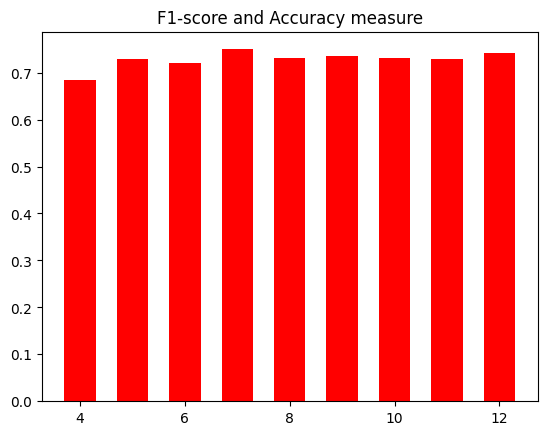

In [148]:
accuracies = np.array(accuracies)
f1_scores_1 = np.array(f_scores_1)
f1_scores_0 = np.array(f_scores_0)

average = (f1_scores_0 + f1_scores_1 + accuracies) / 3

plt.title("F1-score and Accuracy measure")
plt.bar(k_values, average, 0.6, color='r')
plt.show()

The highest results belong to K=7 which we can see below:

In [145]:
print(f"accuracy: {class_reports[6]['accuracy']} \nf1-score 0 class: {class_reports[6]['0']['f1-score']} \nf1-score 1 class: {class_reports[6]['1']['f1-score']} ")

accuracy: 0.7321428571428571 
f1-score 0 class: 0.7386759581881533 
f1-score 1 class: 0.7252747252747253 


Now we test different distance measures with this K :

In [143]:
euclidean = KNeighborsClassifier(n_neighbors = 7, metric='euclidean')  ## Since the default distance metric is minkowski, we can use Euclidean
cosine = KNeighborsClassifier(n_neighbors = 7, metric='cosine')

euclidean.fit(new_x_train, new_y_train)
Y_pred_eu = euclidean.predict(new_x_test)

cosine.fit(new_x_train, new_y_train)
Y_pred_co = cosine.predict(new_x_test)

In [144]:
class_report_eu = classification_report(new_y_test, Y_pred_eu)
class_report_co = classification_report(new_y_test, Y_pred_co)

print(f"euclidean distance results: \n{class_report_eu} \n\ncosine distance results: \n{class_report_co} ")

euclidean distance results: 
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       140
           1       0.73      0.79      0.76       140

    accuracy                           0.75       280
   macro avg       0.75      0.75      0.75       280
weighted avg       0.75      0.75      0.75       280
 

cosine distance results: 
              precision    recall  f1-score   support

           0       0.78      0.66      0.71       140
           1       0.70      0.81      0.75       140

    accuracy                           0.74       280
   macro avg       0.74      0.74      0.73       280
weighted avg       0.74      0.74      0.73       280
 


In this case, we can see an improvement in results. Both accuracies have been improved and so do the f1-scores. But in comparison, the Euclidean Distance offers the best results and is suitable for this problem. The Cosine Distance stands at second place and after that, the default metric or "Minkowsky" offer the best results.